# 1. Chargement et exploration initiale des données
• Importer les bibliothèques nécessaires (pandas, numpy, matplotlib, seaborn, 
sklearn) <br>
• Charger le dataset <br>
• Afficher les premières lignes et les informations de base (types de données, 
statistiques descriptives

In [9]:
#Projet Python pour data sciences 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb, sklearn as sk
df=pd.read_csv("Urban Air Quality and Health Impact Dataset.csv")

df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


# 2. Nettoyage et préparation des données
• Identifier et gérer les valeurs manquantes <br>
• Utiliser des techniques comme l'imputation par la moyenne/médiane ou 
des méthodes plus avancées <br>
• Détecter et traiter les valeurs aberrantes<br>
• Utiliser la méthode IQR (IQR = Q3 - Q1) ou z-score pour identifier les 
outliers<br>
• Décider de les supprimer ou de les transformer selon le contexte


In [2]:
nombre_de_lignes = df.shape[0]
print("Nombre de lignes :", nombre_de_lignes)

# Identification des valeurs manquantes
valeurs_vides = df.isnull().sum()

# On ne veut afficher que les colonnes ayant des valeurs manquantes 
colonnes_vides = valeurs_vides[valeurs_vides != 0]
print(colonnes_vides)

preciptype        622
snowdepth          71
stations          933
Condition_Code    431
dtype: int64


In [3]:
# A présent, on veut gérer ces valeurs manquantes pour qu'elles ne faussent pas nos résultats
# Nous analysons tout d'abord la colonne 'preciptype' :

# Afficher les infos de la colonne 'preciptype'
print(df['preciptype'].describe(include='all'))

# Afficher la distribution des valeurs dans 'preciptype', y compris les valeurs manquantes
print("")
print(df['preciptype'].value_counts(dropna=False))

# Utilise la valeur la + fréquente pour remplacer les valeurs manquantes
df['preciptype'].fillna(df['preciptype'].mode()[0], inplace=True)

# Résultat
print("")
print("Résultat final :")
print(df['preciptype'].isnull().sum())


count          378
unique           1
top       ['rain']
freq           378
Name: preciptype, dtype: object

preciptype
NaN         622
['rain']    378
Name: count, dtype: int64

Résultat final :
0


C:\Users\phile\AppData\Local\Temp\ipykernel_24808\1818788517.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['preciptype'].fillna(df['preciptype'].mode()[0], inplace=True)


# 3. Analyse exploratoire des données (EDA)
• Visualiser la distribution des variables (histogrammes, boxplots) <br>
• Analyser les corrélations entre les variables (heatmap de corrélation)<br>
• Créer des visualisations pertinentes pour comprendre les relations entre les 
variables et le statut diabétique

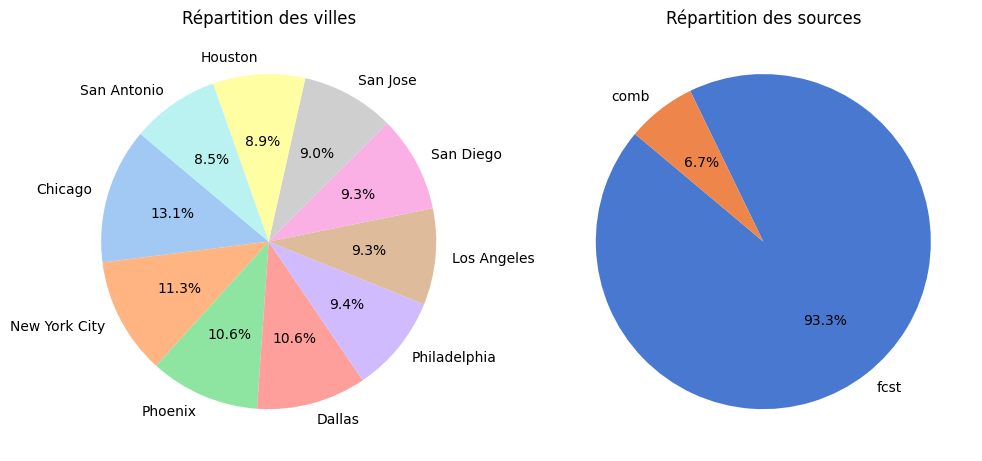

In [16]:
# Comptage du nombre d'occurrences de chaque ville
city_counts = df['City'].value_counts()

# Création du camembert pour la répartition des villes
plt.figure(figsize=(10, 5))

# Premier graphique : répartition des villes
plt.subplot(1, 2, 1)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Répartition des villes")

# Deuxième graphique : répartition des sources
source_counts = df['source'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Répartition des sources")

plt.tight_layout()
plt.show()

# 4. Préparation pour la modélisation
• Diviser les données en ensembles d'entraînement et de test <br>
• Normaliser/standardiser les features ( caractéristiques) si nécessaire

# 5. Régression linéaire
• Implémenter une régression linéaire multiple pour prédire une variable continue <br>
• Évaluer le modèle (R², RMSE) et interpréter les coefficients

# 6. Classification et Machine Learning
• Comparer ces algorithmes et choisir le plus adapté pour votre étude : <br>
    •  Régression logistique<br>
    • Arbre de décision<br>
    • Random Forest<br>
• SVM<br>
• Évaluer les performances (précision, rappel, F1-score, courbe ROC)<br>
• Optimiser les hyperparamètres avec GridSearchCV ou RandomizedSearchCV

# 8. Prédiction et Déploiement du Modèle
• Sélectionner le meilleur modèle basé sur les performances<br>
• Entraîner le modèle final sur l'ensemble des données<br>
• Créer une fonction de prédiction qui prend en entrée des caractéristiques
(features) et permet de prédire des résultats (à vous de préciser quel type de 
résultat prédire)<br>
• Développer une interface simple pour utiliser le modèle (par exemple, avec 
Streamlit ou Flask)


# 9. Interprétation et conclusions
• Résumer les principaux insights de l'analyse<br>
• Identifier les facteurs les plus importants pour la prédiction selon le domaine 
choisi<br>
• Proposer des recommandations basées sur les résultats